# Sujet
L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.
La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :
•	Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.
•	Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.
•	Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.
Le direction fait donc appel à vous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et lui proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.


# Etape 1 : Pré-traitement des données

In [1]:
# Import libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, warnings
warnings.filterwarnings('ignore')

In [2]:
# Import csv files
in_time_csv = pd.read_csv('./Base Data/in_time.csv')
out_time_csv = pd.read_csv('./Base Data/out_time.csv')
general_data_csv = pd.read_csv('./Base Data/general_data.csv')
manager_survey_data_csv = pd.read_csv('./Base Data/manager_survey_data.csv')
employee_survey_data_csv = pd.read_csv('./Base Data/employee_survey_data.csv')

Préparation des données de pointage :
- On supprime les valeurs manquantes (NaN) qui correspondent à un non-pointage
- On supprime les colonnes composées uniquement de NaN
- On transforme les pointages en quantité horaires travaillées

In [3]:
# Traitement des données de pointage
in_time_csv.shape

(4410, 262)

In [4]:
in_time_csv

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 09:20:32,2015-01-05 10:17:53,2015-01-06 10:26:51,2015-01-07 10:06:58,2015-01-08 09:45:06,2015-01-09 09:49:24,2015-01-12 09:37:10,2015-01-13 09:25:02,...,2015-12-18 10:01:06,2015-12-21 10:25:25,2015-12-22 10:16:11,2015-12-23 10:04:40,2015-12-24 09:45:40,NaN,2015-12-28 10:15:39,2015-12-29 10:10:09,2015-12-30 09:28:19,2015-12-31 10:00:12
4406,4407,NaN,2015-01-02 10:03:41,NaN,2015-01-06 09:44:00,2015-01-07 09:42:10,2015-01-08 10:00:57,2015-01-09 09:44:04,2015-01-12 10:07:32,2015-01-13 10:05:11,...,2015-12-18 09:27:32,2015-12-21 09:41:24,2015-12-22 09:50:30,2015-12-23 10:32:21,2015-12-24 09:47:41,NaN,2015-12-28 09:54:23,2015-12-29 10:13:32,2015-12-30 10:21:09,2015-12-31 10:09:48
4407,4408,NaN,2015-01-02 10:01:01,2015-01-05 09:33:00,2015-01-06 09:49:17,2015-01-07 10:28:12,2015-01-08 09:47:38,2015-01-09 10:01:03,2015-01-12 09:49:12,2015-01-13 09:47:10,...,2015-12-18 10:00:57,2015-12-21 09:51:07,2015-12-22 10:02:10,2015-12-23 09:58:29,2015-12-24 09:56:05,NaN,2015-12-28 09:59:24,NaN,2015-12-30 10:02:36,2015-12-31 10:03:30
4408,4409,NaN,2015-01-02 10:17:05,2015-01-05 10:02:27,2015-01-06 10:12:50,2015-01-07 10:12:31,2015-01-08 09:42:57,NaN,2015-01-12 10:00:38,2015-01-13 09:48:03,...,2015-12-18 09:54:33,2015-12-21 10:01:08,2015-12-22 10:10:19,2015-12-23 09:42:30,2015-12-24 09:56:05,NaN,2015-12-28 09:55:25,2015-12-29 09:54:42,2015-12-30 10:15:44,2015-12-31 09:56:47


In [5]:
out_time_csv.shape

(4410, 262)

In [6]:
out_time_csv

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,4406,NaN,2015-01-02 17:27:37,2015-01-05 19:08:20,2015-01-06 18:50:49,2015-01-07 18:57:40,2015-01-08 17:58:31,2015-01-09 18:06:15,2015-01-12 17:58:48,2015-01-13 18:10:35,...,2015-12-18 18:06:05,2015-12-21 18:35:06,2015-12-22 18:33:44,2015-12-23 18:40:56,2015-12-24 18:21:29,NaN,2015-12-28 18:44:35,2015-12-29 19:14:38,2015-12-30 18:24:56,2015-12-31 18:30:41
4406,4407,NaN,2015-01-02 16:19:01,NaN,2015-01-06 15:07:37,2015-01-07 15:25:50,2015-01-08 16:12:33,2015-01-09 15:26:56,2015-01-12 16:10:42,2015-01-13 16:22:43,...,2015-12-18 15:23:02,2015-12-21 15:31:14,2015-12-22 15:45:59,2015-12-23 16:38:59,2015-12-24 15:47:15,NaN,2015-12-28 15:34:34,2015-12-29 16:47:02,2015-12-30 16:03:17,2015-12-31 16:18:39
4407,4408,NaN,2015-01-02 17:17:35,2015-01-05 17:08:07,2015-01-06 17:27:46,2015-01-07 18:27:22,2015-01-08 17:05:25,2015-01-09 17:02:57,2015-01-12 17:35:45,2015-01-13 17:15:52,...,2015-12-18 17:48:05,2015-12-21 17:43:05,2015-12-22 17:47:23,2015-12-23 17:43:37,2015-12-24 17:20:12,NaN,2015-12-28 17:43:28,NaN,2015-12-30 17:48:14,2015-12-31 18:08:55
4408,4409,NaN,2015-01-02 19:48:37,2015-01-05 19:37:40,2015-01-06 20:00:08,2015-01-07 19:35:59,2015-01-08 18:55:13,NaN,2015-01-12 19:18:17,2015-01-13 19:24:02,...,2015-12-18 19:52:44,2015-12-21 19:21:35,2015-12-22 19:32:40,2015-12-23 18:57:00,2015-12-24 19:37:57,NaN,2015-12-28 19:58:36,2015-12-29 18:55:26,2015-12-30 19:37:22,2015-12-31 19:33:45


In [7]:
# Création d'un tablea entier contenant les valeurs d'entrée et de sorti par jour
total_time_csv = in_time_csv.append(out_time_csv, ignore_index=True)
# Transformation de tous les NaN à 0 (cela correspond à un non-pointage et permet d'arriver à un total de 0 heurs travaillées dans le jour lros de la soustraction)
total_time_csv = total_time_csv.replace(np.nan, 0)
# Conversion des valeurs en datetime
total_time_csv.iloc[:, 1:] = total_time_csv.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')
# Les deux fichiers contiennent 4410 lignes, donc on effectue la soustraction sur cet axe
total_time_csv = total_time_csv.diff(periods=4410, axis=0)
total_time_csv = total_time_csv.iloc[4410:]
total_time_csv.reset_index(inplace=True)
# Suppression de toutes les colonnes hors pointage (comme les jours fériés)
total_time_csv.drop(columns=['Unnamed: 0', '2015-01-01', '2015-01-14','2015-01-26','2015-03-05',
             '2015-05-01','2015-07-17','2015-09-17','2015-10-02',
              '2015-11-09','2015-11-10','2015-11-11','2015-12-25', 'index'
             ],axis=1,inplace=True)
# Conclusion sur un taux d'heures moyen par jour
total_time_csv['Mean Time']=total_time_csv.mean(axis=1)
total_time_csv['hrs']=total_time_csv['Mean Time']/np.timedelta64(1, 'h')
total_time_csv.reset_index(inplace=True)
total_time_csv.drop(total_time_csv.columns.difference(['index','hrs']), 1, inplace=True)
# On renomme l'index pour faire l'inner join avec les autres fichiers
total_time_csv.rename(columns={'index': 'EmployeeID'},inplace=True)

total_time_csv

,EmployeeID,hrs
0,0,6.870229
1,1,7.315971
2,2,6.816081
3,3,6.789215
4,4,7.877561
...,...,...
4405,4405,8.316921
4406,4406,5.897197
4407,4407,7.149526
4408,4408,9.187612


Création du fichier de données complètes :

In [8]:
# Fusion des csv
complete_csv = pd.merge(general_data_csv, total_time_csv, on='EmployeeID', how='inner')
complete_csv = pd.merge(complete_csv, manager_survey_data_csv, on='EmployeeID', how='inner')
complete_csv = pd.merge(complete_csv, employee_survey_data_csv, on='EmployeeID', how='inner')
complete_csv

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,hrs,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,7.315971,3,3,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,6.816081,2,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,6.789215,3,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,7.877561,2,3,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,10.275802,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,29,No,Travel_Rarely,Sales,4,3,Other,1,4405,Female,...,2,6,1,5,8.316921,2,3,3.0,4.0,3.0
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,5,3,0,2,5.897197,3,3,4.0,1.0,3.0
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2,3,0,2,7.149526,2,3,4.0,4.0,3.0
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,4,4,1,2,9.187612,3,4,1.0,3.0,3.0


Suppression des colonnes à ne pas traiter :

In [9]:
# Suppression des colonnes ne contenant qu'une seule valeur
for col in complete_csv.columns:
    if len(complete_csv[col].unique()) == 1:
        complete_csv.drop(columns=[col],axis=1,inplace=True)
        print("Supprimé : " + col + " (Cause : Toutes les valeurs sont identiques)")

# Supprssion des colonnes liées aux RGPD (identification des employés)
complete_csv.drop(columns=['MaritalStatus', 'Age', 'Gender', 'EmployeeID'],axis=1,inplace=True)
print("Supprimés : EmployeeID, Age, Gender, EmployeeID (Cause : RGPD)")


Supprimé : EmployeeCount (Cause : Toutes les valeurs sont identiques)
Supprimé : Over18 (Cause : Toutes les valeurs sont identiques)
Supprimé : StandardHours (Cause : Toutes les valeurs sont identiques)
Supprimés : EmployeeID, Age, Gender, EmployeeID (Cause : RGPD)


Remplissage des données manquantes :

In [10]:
# Retourne la liste des colonnes avec des valeurs manquantes
for col in complete_csv.columns:
    if complete_csv[col].isna().values.any():
        print("Colonne avec NaN à compléter : " + col + " (Type : " + str(complete_csv[col].dtype) + ")")

Colonne avec NaN à compléter : NumCompaniesWorked (Type : float64)
Colonne avec NaN à compléter : TotalWorkingYears (Type : float64)
Colonne avec NaN à compléter : EnvironmentSatisfaction (Type : float64)
Colonne avec NaN à compléter : JobSatisfaction (Type : float64)
Colonne avec NaN à compléter : WorkLifeBalance (Type : float64)


Toutes ces colonnes peuvent avoir leurs valeurs manquantes remplacées par la médiane de la colonne car elles sont toutes numériques.

In [11]:
# Remplissage des NaN par la médiane de la colonne
for col in complete_csv.columns:
    if complete_csv[col].isna().values.any():
        complete_csv[col].fillna(complete_csv[col].median(), inplace=True)
        print("Colonne remplie avec la médiane : " + col)
# Vérification de la complétude des données
if complete_csv.isnull().values.any():
    print("Le dataset n'est pas complètement rempli.")
else:
    print("Le dataset est complètement rempli.")

Colonne remplie avec la médiane : NumCompaniesWorked
Colonne remplie avec la médiane : TotalWorkingYears
Colonne remplie avec la médiane : EnvironmentSatisfaction
Colonne remplie avec la médiane : JobSatisfaction
Colonne remplie avec la médiane : WorkLifeBalance
Le dataset est complètement rempli.


Correction des types de données incorrects :
Ces données ne sont pas représentatives "linéairement", il faut donc les passer en type "object" pour éviter des erreurs lors de l'analyse.

In [12]:
complete_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4409 non-null   object 
 1   BusinessTravel           4409 non-null   object 
 2   Department               4409 non-null   object 
 3   DistanceFromHome         4409 non-null   int64  
 4   Education                4409 non-null   int64  
 5   EducationField           4409 non-null   object 
 6   JobLevel                 4409 non-null   int64  
 7   JobRole                  4409 non-null   object 
 8   MonthlyIncome            4409 non-null   int64  
 9   NumCompaniesWorked       4409 non-null   float64
 10  PercentSalaryHike        4409 non-null   int64  
 11  StockOptionLevel         4409 non-null   int64  
 12  TotalWorkingYears        4409 non-null   float64
 13  TrainingTimesLastYear    4409 non-null   int64  
 14  YearsAtCompany          

In [13]:
complete_csv['Education'] = complete_csv['Education'].astype('object')
complete_csv['EnvironmentSatisfaction'] = complete_csv['EnvironmentSatisfaction'].astype('object')
complete_csv['JobInvolvement'] = complete_csv['JobInvolvement'].astype('object')
complete_csv['JobSatisfaction'] = complete_csv['JobSatisfaction'].astype('object')
complete_csv['PerformanceRating'] = complete_csv['PerformanceRating'].astype('object')
complete_csv['JobLevel'] = complete_csv['JobLevel'].astype('object')
complete_csv['WorkLifeBalance'] = complete_csv['WorkLifeBalance'].astype('object')
complete_csv

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,hrs,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,131160,1.0,...,6,1,0,0,7.315971,3,3,3.0,4.0,2.0
1,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,41890,0.0,...,3,5,1,4,6.816081,2,4,3.0,2.0,4.0
2,No,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,193280,1.0,...,2,5,0,3,6.789215,3,3,2.0,2.0,1.0
3,No,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,83210,3.0,...,5,8,7,5,7.877561,2,3,4.0,4.0,3.0
4,No,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,23420,4.0,...,2,6,0,4,10.275802,3,3,4.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,No,Travel_Rarely,Sales,4,3,Other,2,Human Resources,35390,1.0,...,2,6,1,5,8.316921,2,3,3.0,4.0,3.0
4405,No,Travel_Rarely,Research & Development,5,4,Medical,1,Research Scientist,60290,3.0,...,5,3,0,2,5.897197,3,3,4.0,1.0,3.0
4406,No,Travel_Rarely,Research & Development,2,4,Medical,1,Laboratory Technician,26790,2.0,...,2,3,0,2,7.149526,2,3,4.0,4.0,3.0
4407,No,Travel_Rarely,Research & Development,25,2,Life Sciences,2,Sales Executive,37020,0.0,...,4,4,1,2,9.187612,3,4,1.0,3.0,3.0


Remplacement des valeurs numériques par des valeurs textuelles :
Le jeu de données est assez propre, il ne reste plus qu'à remplacer certaines valeurs numériques par des valeurs textuelles

In [14]:
# general_data
complete_csv['Education'].replace({1: 'BAC', 2: 'BAC+2', 3: 'BAC+3', 4: 'BAC+5', 5: 'Doctorat'}, inplace=True)
# manager_survey
complete_csv['JobInvolvement'].replace({1: 'Faible', 2: 'Moyenne', 3: 'Importante', 4: 'Très importante'}, inplace=True)
complete_csv['PerformanceRating'].replace({1: 'Faible', 2: 'Bon', 3: 'Excellent', 4: 'Au delà des attentes'}, inplace=True)
# employee_survey
complete_csv['EnvironmentSatisfaction'].replace({1: 'Faible', 2: 'Moyen', 3: 'Élevé', 4: 'Très élevé'}, inplace=True)
complete_csv['JobSatisfaction'].replace({1: 'Faible', 2: 'Moyen', 3: 'Élevé', 4: 'Très élevé'}, inplace=True)
complete_csv['WorkLifeBalance'].replace({1: 'Mauvais', 2: 'Satisfaisant', 3: 'Très satisfaisant', 4: 'Excellent'}, inplace=True)

Exportation du fichier de données complètes :

In [15]:
complete_csv.to_pickle('./Datasets/complete_dataset_no_scaling.pkl')

# Etape 2 : Case Study

Les graphiques étant long à générer en fonction du matériel, pour l'analyse des données, se référer au fichier "Case Study.ipynb".

# Etape 3 : Préparation des données

Utilisation d'un one-hot encoding pour les variables catégorielles :

In [16]:
# Récupération des colonnes catégorielles (sauf "Attrition")
cat_cols = complete_csv.select_dtypes(exclude=['int64', 'float64']).drop(columns=['Attrition']).columns
# Génération des colonnes one-hot encoding
dummy_df = pd.get_dummies(complete_csv[cat_cols], drop_first=True)
# Concaténation des colonnes one-hot encoding avec le dataset complet
finished_dataset = pd.concat([complete_csv, dummy_df], axis=1)
# Suppression des colonnes catégorielles (sauf "Attrition")
finished_dataset.drop(columns=cat_cols, inplace=True)
# Remplacement des valeurs "Yes" et "No" par 1 et 0
finished_dataset['Attrition'] = complete_csv['Attrition'].map({'Yes': 1, 'No': 0})
finished_dataset.to_pickle('./Datasets/complete_dataset_one_hot_no_scaling.pkl')
finished_dataset

,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,...,PerformanceRating_Excellent,EnvironmentSatisfaction_Moyen,EnvironmentSatisfaction_Très élevé,EnvironmentSatisfaction_Élevé,JobSatisfaction_Moyen,JobSatisfaction_Très élevé,JobSatisfaction_Élevé,WorkLifeBalance_Mauvais,WorkLifeBalance_Satisfaisant,WorkLifeBalance_Très satisfaisant
0,0,6,131160,1.0,11,0,1.0,6,1,0,...,1,0,0,1,0,1,0,0,1,0
1,1,10,41890,0.0,23,1,6.0,3,5,1,...,0,0,0,1,1,0,0,0,0,0
2,0,17,193280,1.0,15,3,5.0,2,5,0,...,1,1,0,0,1,0,0,1,0,0
3,0,2,83210,3.0,11,3,13.0,5,8,7,...,1,0,1,0,0,1,0,0,0,1
4,0,10,23420,4.0,12,2,9.0,2,6,0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,0,4,35390,1.0,18,0,6.0,2,6,1,...,1,0,0,1,0,1,0,0,0,1
4405,0,5,60290,3.0,17,1,10.0,5,3,0,...,1,0,1,0,0,0,0,0,0,1
4406,0,2,26790,2.0,15,0,10.0,2,3,0,...,1,0,1,0,0,1,0,0,0,1
4407,0,25,37020,0.0,20,0,5.0,4,4,1,...,0,0,0,0,0,0,1,0,0,1


In [17]:
complete_csv

,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,hrs,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,No,Travel_Rarely,Sales,6,BAC+2,Life Sciences,1,Healthcare Representative,131160,1.0,...,6,1,0,0,7.315971,Importante,Excellent,Élevé,Très élevé,Satisfaisant
1,Yes,Travel_Frequently,Research & Development,10,BAC,Life Sciences,1,Research Scientist,41890,0.0,...,3,5,1,4,6.816081,Moyenne,Au delà des attentes,Élevé,Moyen,Excellent
2,No,Travel_Frequently,Research & Development,17,BAC+5,Other,4,Sales Executive,193280,1.0,...,2,5,0,3,6.789215,Importante,Excellent,Moyen,Moyen,Mauvais
3,No,Non-Travel,Research & Development,2,Doctorat,Life Sciences,3,Human Resources,83210,3.0,...,5,8,7,5,7.877561,Moyenne,Excellent,Très élevé,Très élevé,Très satisfaisant
4,No,Travel_Rarely,Research & Development,10,BAC,Medical,1,Sales Executive,23420,4.0,...,2,6,0,4,10.275802,Importante,Excellent,Très élevé,Faible,Très satisfaisant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,No,Travel_Rarely,Sales,4,BAC+3,Other,2,Human Resources,35390,1.0,...,2,6,1,5,8.316921,Moyenne,Excellent,Élevé,Très élevé,Très satisfaisant
4405,No,Travel_Rarely,Research & Development,5,BAC+5,Medical,1,Research Scientist,60290,3.0,...,5,3,0,2,5.897197,Importante,Excellent,Très élevé,Faible,Très satisfaisant
4406,No,Travel_Rarely,Research & Development,2,BAC+5,Medical,1,Laboratory Technician,26790,2.0,...,2,3,0,2,7.149526,Moyenne,Excellent,Très élevé,Très élevé,Très satisfaisant
4407,No,Travel_Rarely,Research & Development,25,BAC+2,Life Sciences,2,Sales Executive,37020,0.0,...,4,4,1,2,9.187612,Importante,Au delà des attentes,Faible,Élevé,Très satisfaisant


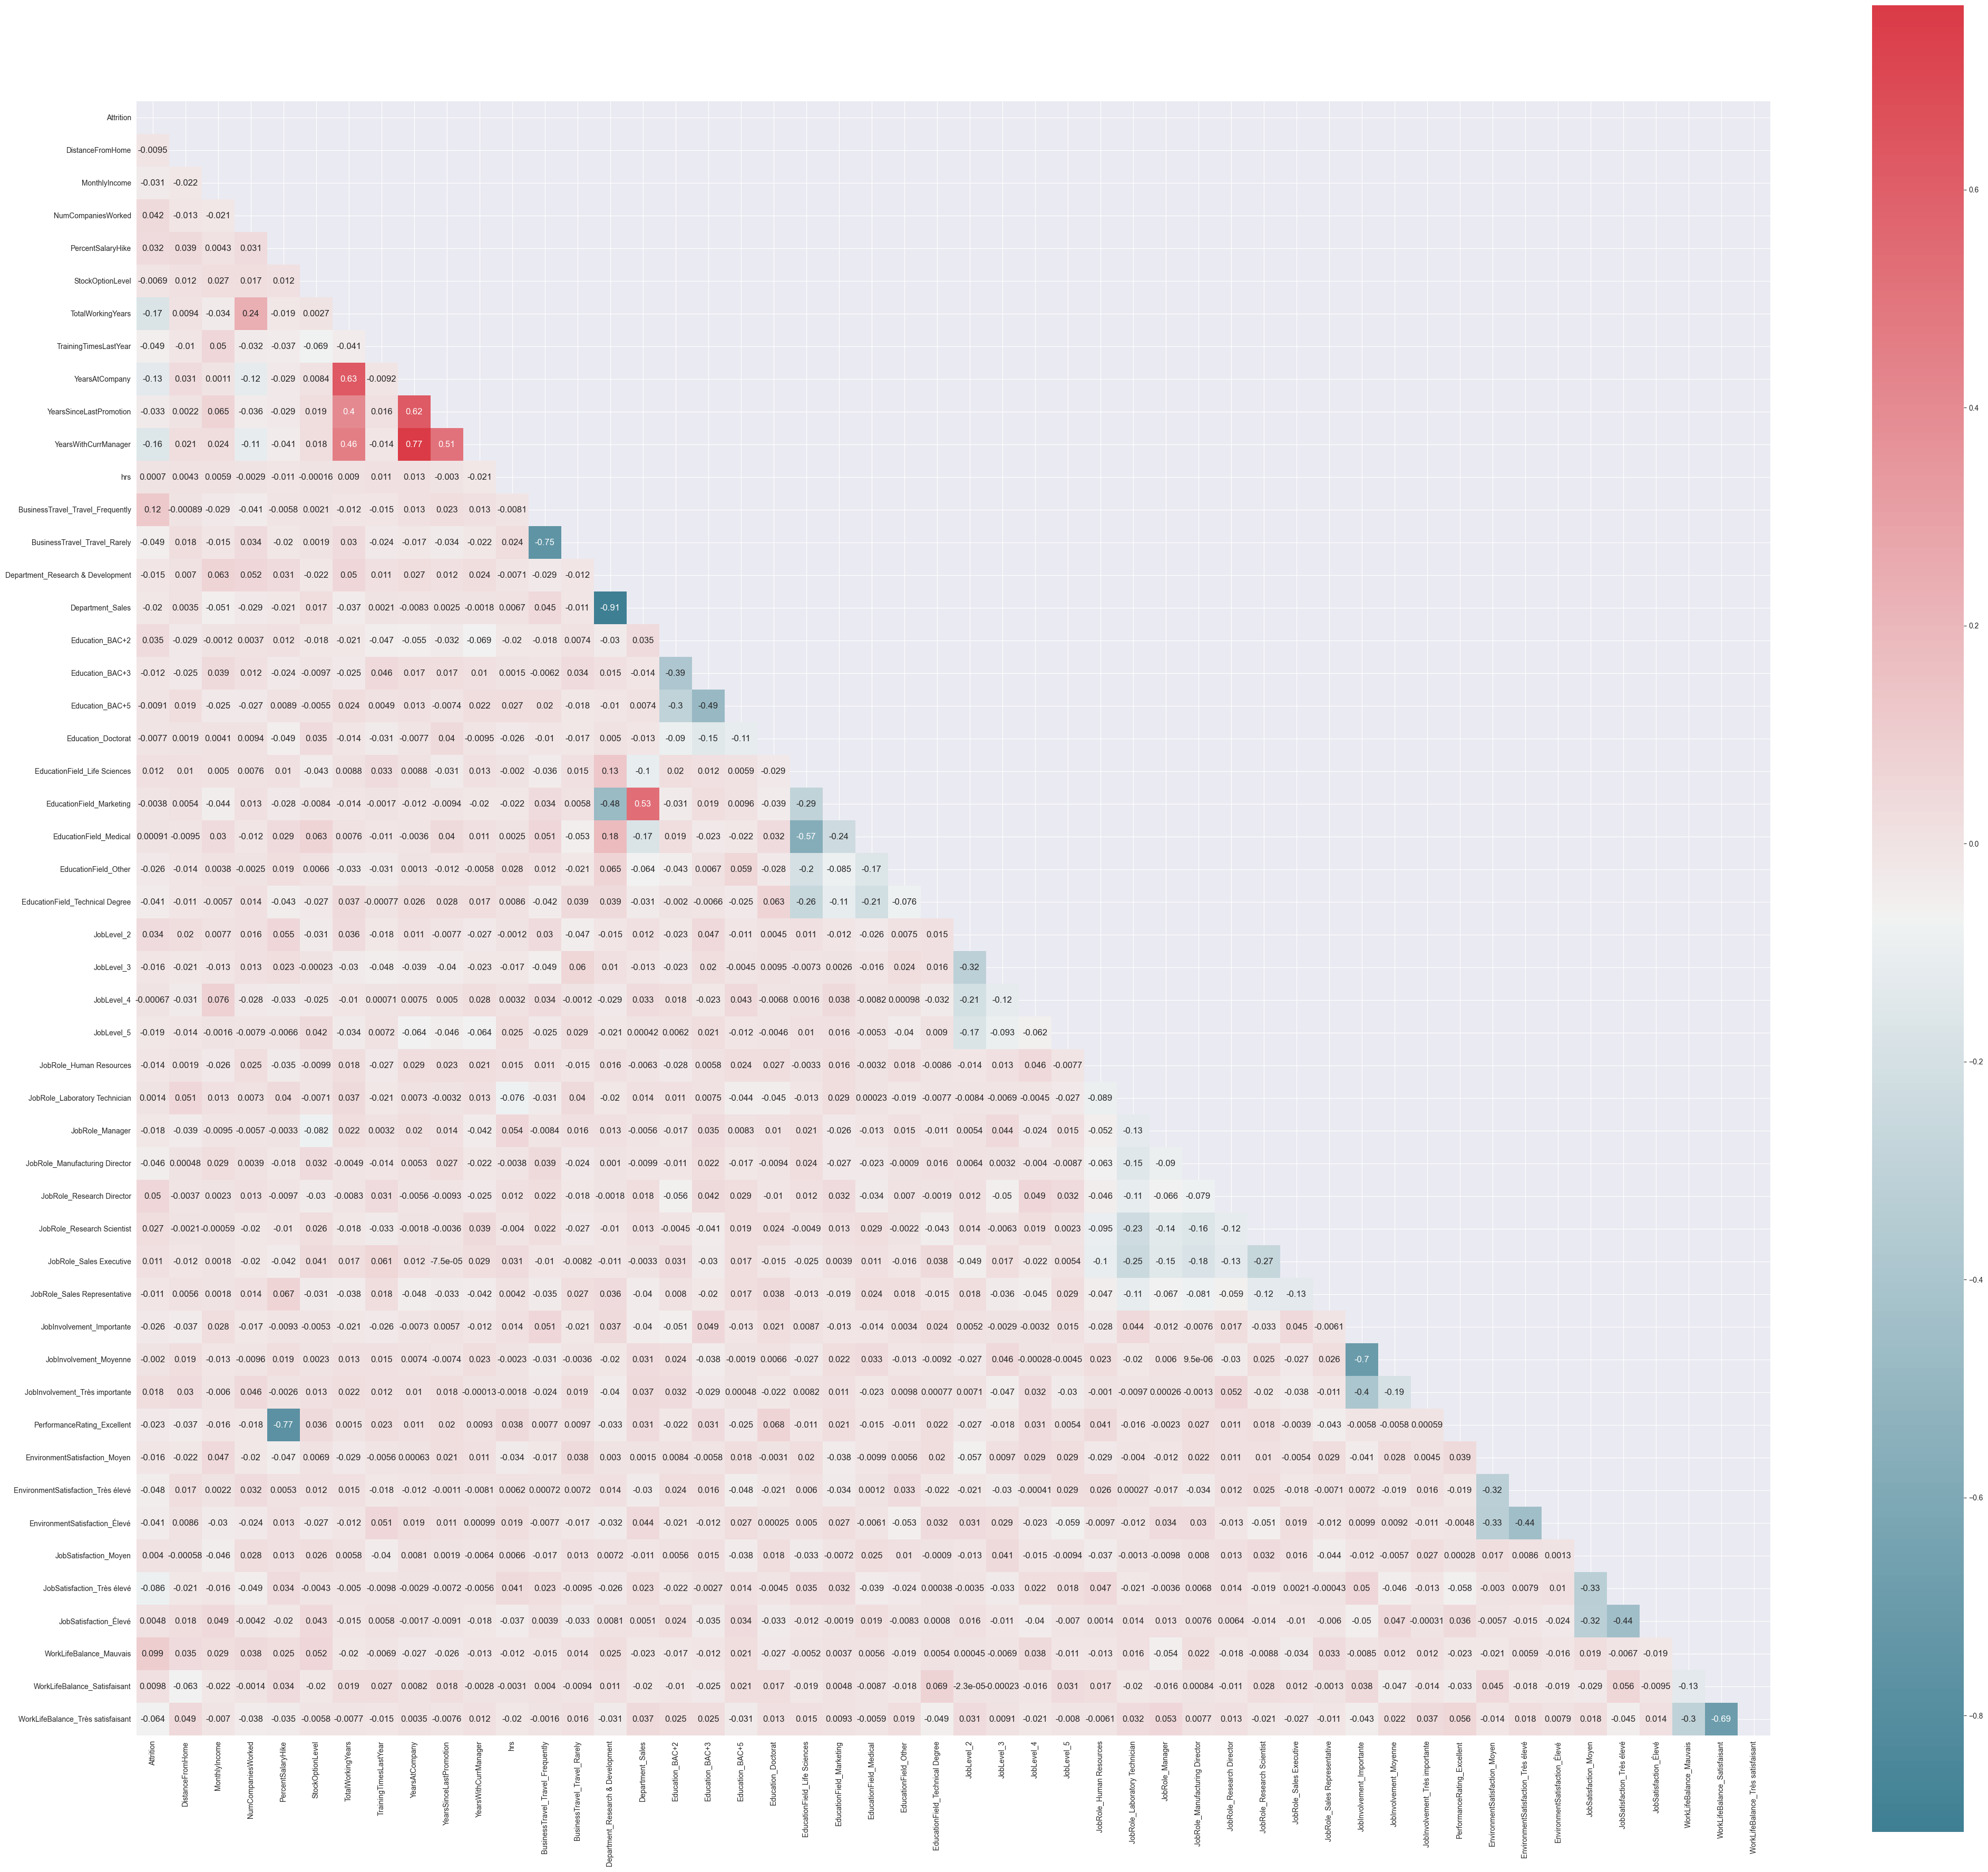

In [18]:
# Fonction de génération de graphiques de corrélation
def plot_correlation_map( df, Size=25 ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( Size , Size ) )
    triangle_mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        mask=triangle_mask,
        annot = True,
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(finished_dataset,50)

 Application d'un feature scaling :

In [19]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

finished_dataset[['MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DistanceFromHome','hrs']] = sc.fit_transform(finished_dataset[['MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DistanceFromHome','hrs']])
finished_dataset.to_pickle('./Datasets/complete_dataset_one_hot_with_scaling.pkl')
###TEST
complete_csv['Attrition'] = complete_csv['Attrition'].map({'Yes': 1, 'No': 0})


In [22]:
complete_csv_without_scaling = complete_csv.copy()

complete_csv[['MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DistanceFromHome','hrs']] = sc.fit_transform(complete_csv[['MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'DistanceFromHome','hrs']])

complete_csv.to_pickle('./Datasets/complete_dataset_with_scaling.pkl')


Application d'un PCA pour réduire la dimensionnalité :

In [504]:
# PCA (on doit garder le One-Hot car le PCA ne prend pas en charge les catégories par string)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(finished_dataset.drop('Attrition', axis=1))
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, finished_dataset[['Attrition']]], axis = 1)
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.16353095 0.07204044]


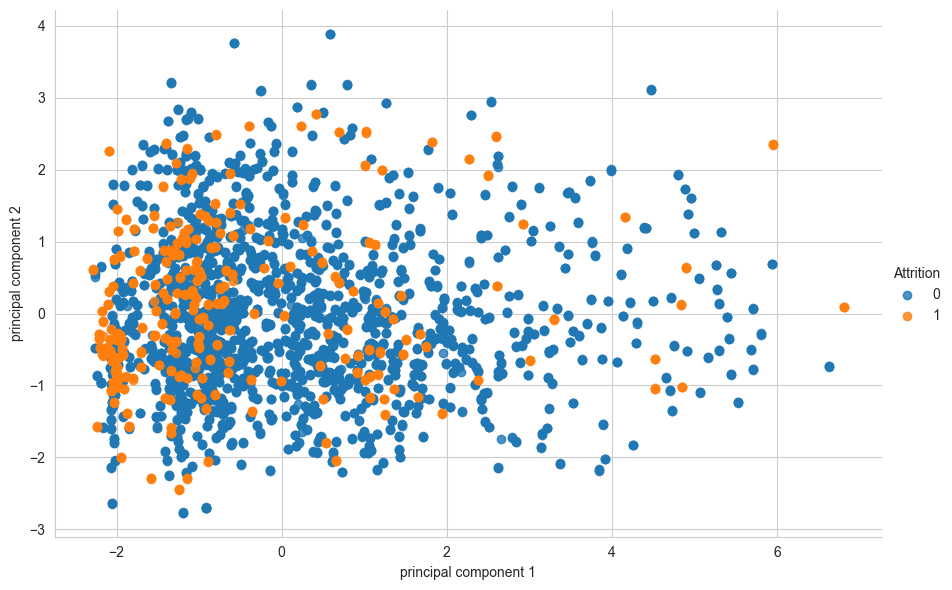

In [505]:
# Visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.lmplot(x = 'principal component 1',y = 'principal component 2', data=finalDf, hue='Attrition', fit_reg=False, height=6, aspect=1.5)
plt.show()

Application d'un t-SNE pour réduire la dimensionnalité :

In [506]:
# t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(finished_dataset.drop('Attrition', axis=1))
tsneDf = pd.DataFrame(data = tsne_results, columns = ['tsne component 1', 'tsne component 2'])
finalDf = pd.concat([tsneDf, finished_dataset[['Attrition']]], axis = 1)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 4409 samples in 0.002s...
[t-SNE] Computed neighbors for 4409 samples in 0.943s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4409
[t-SNE] Computed conditional probabilities for sample 2000 / 4409
[t-SNE] Computed conditional probabilities for sample 3000 / 4409
[t-SNE] Computed conditional probabilities for sample 4000 / 4409
[t-SNE] Computed conditional probabilities for sample 4409 / 4409
[t-SNE] Mean sigma: 1.939065
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.954590
[t-SNE] KL divergence after 300 iterations: 2.657748


Visualisation des données :

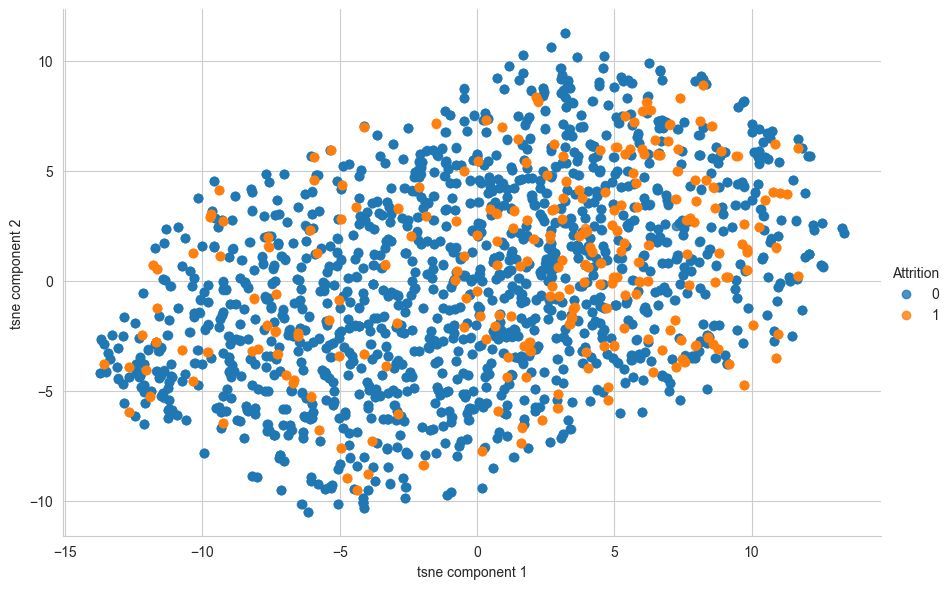

In [507]:
# Visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.lmplot(x = 'tsne component 1',y = 'tsne component 2', data=finalDf, hue='Attrition', fit_reg=False, height=6, aspect=1.5)
plt.show()

Application d'un UMAP pour réduire la dimensionnalité :

In [508]:
# UMAP
import umap.umap_ as umap
reducer = umap.UMAP()
umap_results = reducer.fit_transform(finished_dataset.drop('Attrition', axis=1))
umapDf = pd.DataFrame(data = umap_results, columns = ['umap component 1', 'umap component 2'])
finalDf = pd.concat([umapDf, finished_dataset[['Attrition']]], axis = 1)


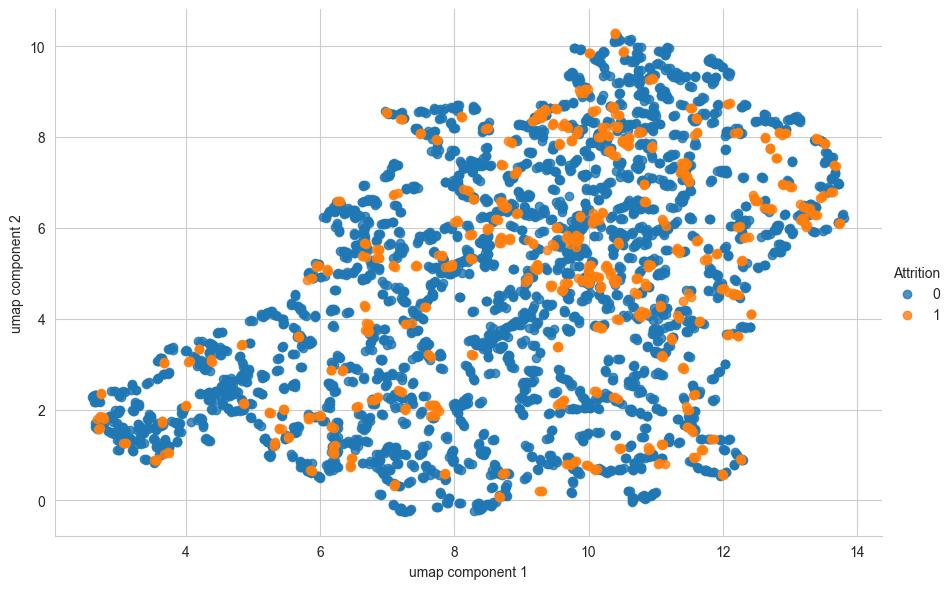

In [509]:
# Visualisation des données
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.lmplot(x = 'umap component 1',y = 'umap component 2', data=finalDf, hue='Attrition', fit_reg=False, height=6, aspect=1.5)
plt.show()

Application d'un MCA pour réduire la dimensionnalité :
https://maxhalford.github.io/prince/mca/

In [510]:
# MCA
import prince
dataset = complete_csv_without_scaling.copy()
# drop attrition
dataset = dataset.drop('Attrition', axis=1)
dataset.columns = ['BusinessTravel', 'Department', 'DistanceFromHome',
                   'Education', 'EducationField', 'JobLevel', 'JobRole', 'MonthlyIncome',
                   'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel',
                   'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
                   'YearsSinceLastPromotion', 'YearsWithCurrManager', 'hrs',
                   'JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction',
                   'JobSatisfaction', 'WorkLifeBalance']

# Récupération des colonnes catégorielles (sauf "Attrition")
cat_cols = dataset.select_dtypes(exclude=['int64', 'float64']).columns
# Génération des colonnes one-hot encoding
dummy_df = pd.get_dummies(dataset[cat_cols], drop_first=True)
# Concaténation des colonnes one-hot encoding avec le dataset complet
dataset = pd.concat([dataset, dummy_df], axis=1)
# Suppression des colonnes catégorielles (sauf "Attrition")
dataset.drop(columns=cat_cols, inplace=True)



mca = prince.MCA(
    n_components=3,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)
mca = mca.fit(dataset)

mca.eigenvalues_summary

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.001,37.66%,37.66%
1,0.000,10.68%,48.34%
2,0.000,6.30%,54.64%


In [511]:
mca.row_coordinates(dataset).head()

,0,1,2
0,-0.024351,-0.000911,-0.000423
1,0.012096,-0.010609,0.000852
2,-0.022594,-0.000790,-0.004935
3,-0.005318,0.010631,0.000971
4,0.049262,-0.019785,0.010635


In [512]:
mca.column_coordinates(dataset).head()

,0,1,2
DistanceFromHome,0.842746,-0.819446,-0.582012
MonthlyIncome,-0.000890,0.000072,-0.000047
NumCompaniesWorked,0.726225,-0.300581,0.664357
PercentSalaryHike,0.640641,-0.228510,0.262720
StockOptionLevel,0.620004,-0.189789,0.216103


In [513]:
mca.plot(
    dataset,
    x_component=0,
    y_component=1
)

alt.Chart(...)

In [514]:
mca.row_contributions_.head().style.format('{:.0%}')

,0,1,2
0,0%,0%,0%
1,0%,0%,0%
2,0%,0%,0%
3,0%,0%,0%
4,0%,0%,0%


In [515]:
mca.column_contributions_.head().style.format('{:.0%}')

,0,1,2
DistanceFromHome,13%,44%,38%
MonthlyIncome,0%,0%,0%
NumCompaniesWorked,3%,2%,15%
PercentSalaryHike,13%,6%,13%
StockOptionLevel,1%,0%,0%


Application d'un SMOTE-NC pour équilibrer les données :

In [516]:
complete_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Attrition                4409 non-null   int64  
 1   BusinessTravel           4409 non-null   object 
 2   Department               4409 non-null   object 
 3   DistanceFromHome         4409 non-null   float64
 4   Education                4409 non-null   object 
 5   EducationField           4409 non-null   object 
 6   JobLevel                 4409 non-null   object 
 7   JobRole                  4409 non-null   object 
 8   MonthlyIncome            4409 non-null   float64
 9   NumCompaniesWorked       4409 non-null   float64
 10  PercentSalaryHike        4409 non-null   float64
 11  StockOptionLevel         4409 non-null   float64
 12  TotalWorkingYears        4409 non-null   float64
 13  TrainingTimesLastYear    4409 non-null   float64
 14  YearsAtCompany          

# Dernière étape : Prédiction sur le jeu de test

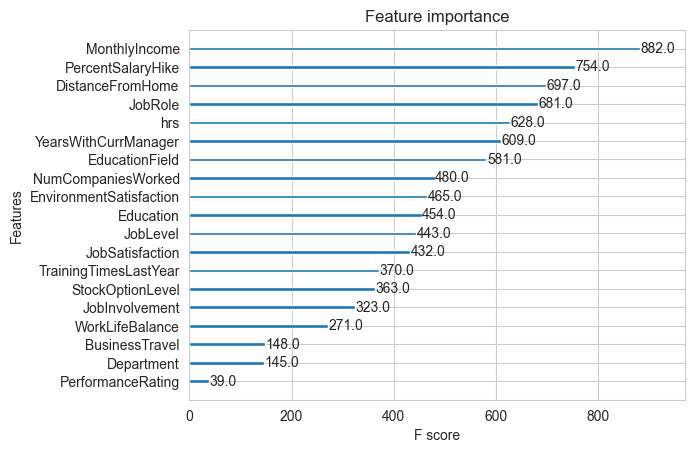

<Figure size 3200x1200 with 0 Axes>

In [534]:
plot_importance(xgb_smotenc)
plt.figure(figsize = (32, 12))
plt.show()

In [535]:
test_inference = xgb_smotenc.predict(X_res_test)
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE: %.3f' % mean_absolute_error(y_res_test, test_inference))
print('RMSE: %.3f' % mean_squared_error(y_res_test, test_inference))
cm = confusion_matrix(y_res_test, test_inference)
cm

MAE: 0.007
RMSE: 0.007


array([[749,   2],
       [  4, 127]], dtype=int64)